<a href="https://colab.research.google.com/github/divy042000/Machine-Learning/blob/main/Logistic_Regression_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

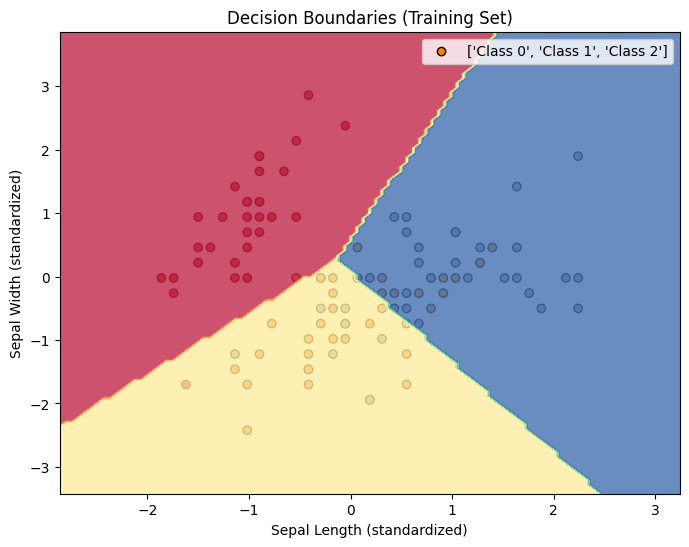

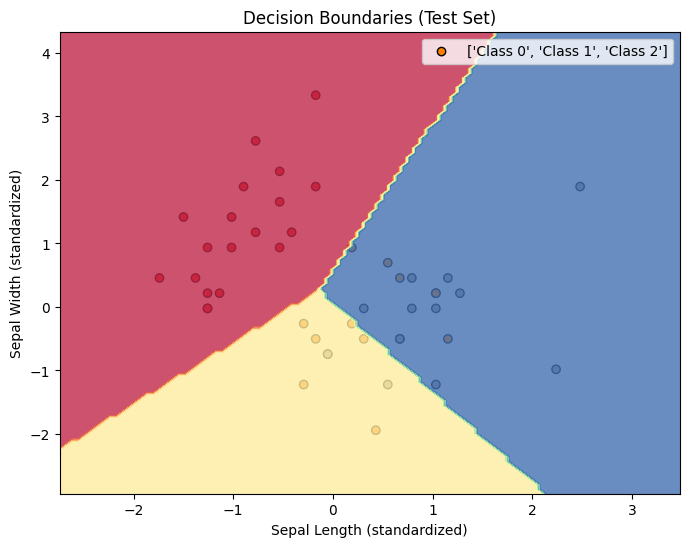

Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]
Accuracy: 0.8222222222222222


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # considering only the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term to the features
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

# Logistic Regression Cost Function for multiclass classification
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return cost, gradient

# Gradient Descent to minimize the cost
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        cost, gradient = cost_function(theta, X, y)
        theta -= alpha * gradient
        cost_history.append(cost)
    return theta, cost_history

# Initialize theta (weights) for each class
num_classes = len(np.unique(y))
theta = np.zeros((num_classes, X_train.shape[1]))

# Set hyperparameters
alpha = 0.01
iterations = 10000

# Train the model for each class
for cls in range(num_classes):
    binary_y_train = np.where(y_train == cls, 1, 0)
    theta[cls], _ = gradient_descent(X_train, binary_y_train, theta[cls], alpha, iterations)

# Predict function for multiclass
def predict_multiclass(X, theta):
    probabilities = sigmoid(np.dot(X, theta.T))
    return np.argmax(probabilities, axis=1)

# Plot Decision Boundaries for all classes
def plot_decision_boundary_multiclass(X, y, theta, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', label=[f'Class {i}' for i in np.unique(y)])
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')

    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    grid = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()]

    predictions = predict_multiclass(grid, theta)
    predictions = predictions.reshape(xx1.shape)
    plt.contourf(xx1, xx2, predictions, cmap=plt.cm.Spectral, alpha=0.8)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

# Plot decision boundaries for training set
plot_decision_boundary_multiclass(X_train, y_train, theta, 'Decision Boundaries (Training Set)')

# Plot decision boundaries for test set
plot_decision_boundary_multiclass(X_test, y_test, theta, 'Decision Boundaries (Test Set)')

# Predict on test set
y_pred = predict_multiclass(X_test, theta)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix and accuracy
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
